## Housing Data Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Housing.csv')
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


#### Analysis of data 

In [3]:
data.shape

(545, 13)

In [4]:
data.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [7]:
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
price,545.0,4.766729e+06,1.870440e+06,1750000.0,3430000.0,4340000.0,5740000.0,13300000.0
area,545.0,5.150541e+03,2.170141e+03,1650.0,3600.0,4600.0,6360.0,16200.0
bedrooms,545.0,2.965138e+00,7.380639e-01,1.0,2.0,3.0,3.0,6.0
bathrooms,545.0,1.286239e+00,5.024696e-01,1.0,1.0,1.0,2.0,4.0
stories,545.0,1.805505e+00,8.674925e-01,1.0,1.0,2.0,2.0,4.0
parking,545.0,6.935780e-01,8.615858e-01,0.0,0.0,0.0,1.0,3.0


In [9]:
data.describe(include = 'object')

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
count,545,545,545,545,545,545,545
unique,2,2,2,2,2,2,3
top,yes,no,no,no,no,no,semi-furnished
freq,468,448,354,520,373,417,227


### Unique data

In [10]:
data['mainroad'].nunique()

2

In [11]:
data['mainroad'].unique()

array(['yes', 'no'], dtype=object)

In [12]:
data['mainroad'].value_counts()

mainroad
yes    468
no      77
Name: count, dtype: int64

In [13]:
data['furnishingstatus']

0           furnished
1           furnished
2      semi-furnished
3           furnished
4           furnished
            ...      
540       unfurnished
541    semi-furnished
542       unfurnished
543         furnished
544       unfurnished
Name: furnishingstatus, Length: 545, dtype: object

In [14]:
data.furnishingstatus.value_counts()

furnishingstatus
semi-furnished    227
unfurnished       178
furnished         140
Name: count, dtype: int64

In [16]:
data.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

<Axes: xlabel='area', ylabel='Density'>

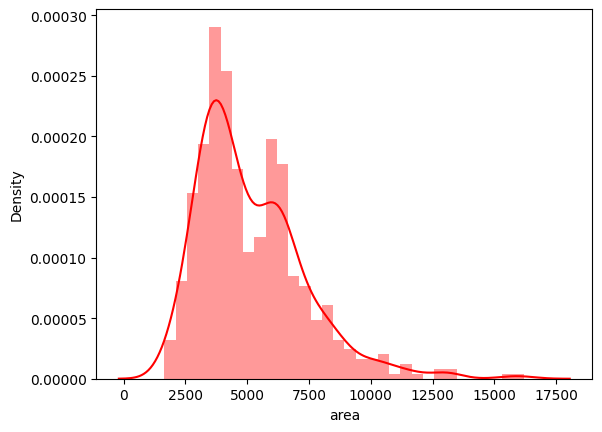

In [18]:
sns.distplot(data['area'], bins=32, color='r')

In [19]:
data['area'].skew()

1.321188343153483

In [20]:
data['area'].median()

4600.0

### Duplicate data

In [21]:
data.duplicated().sum()

0

In [22]:
data[data.duplicated()]

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus


### Data Visualization

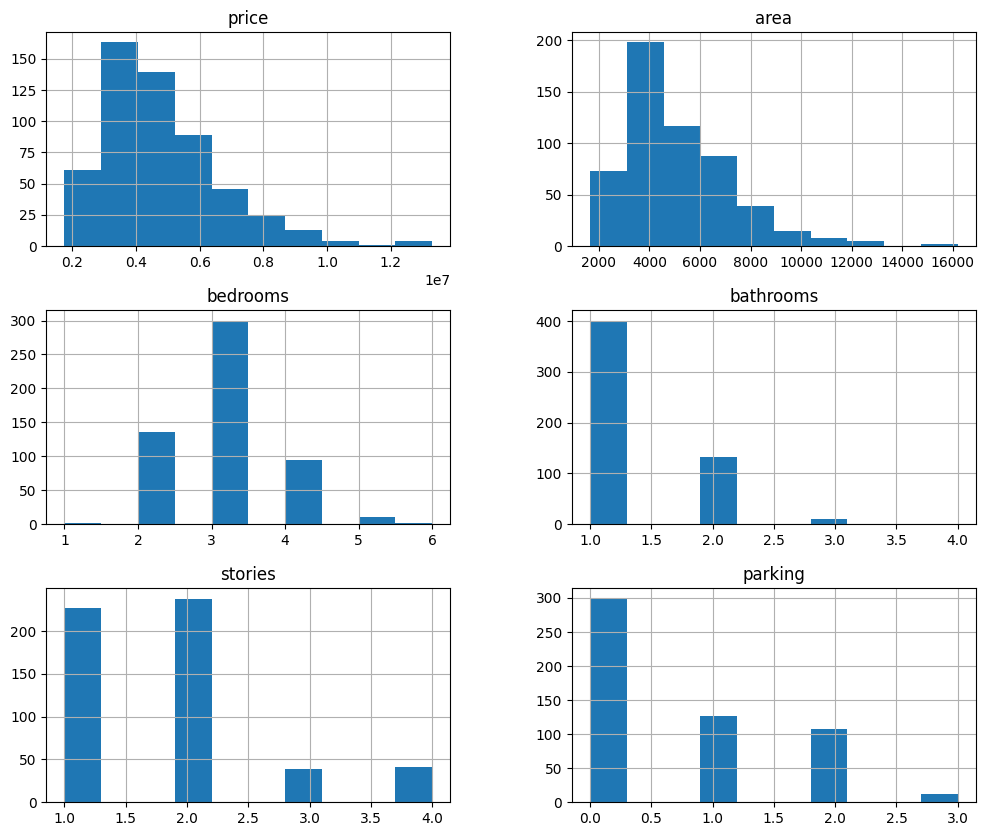

In [24]:
data.hist(figsize=(12,10))
plt.show()

<Axes: >

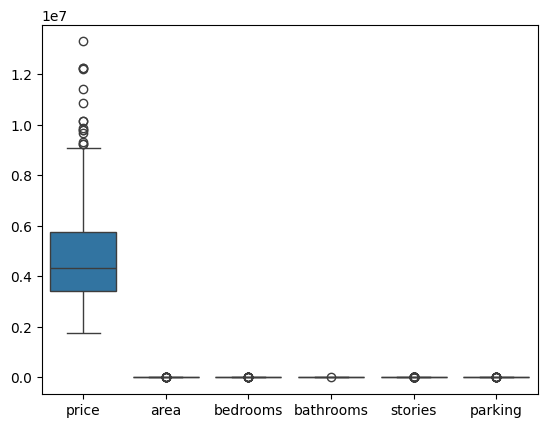

In [25]:
sns.boxplot(data)

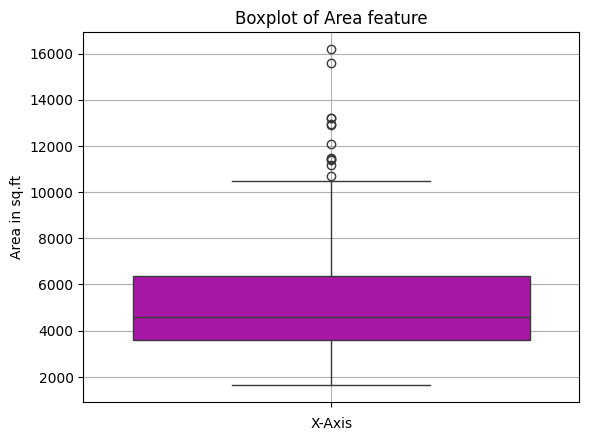

In [26]:
sns.boxplot(data['area'], color = 'm')
plt.title('Boxplot of Area feature')
plt.xlabel('X-Axis')
plt.ylabel('Area in sq.ft')
plt.grid()

In [27]:
data[data['area']> 10100]

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
10,9800000,13200,3,1,2,yes,no,yes,no,yes,2,yes,furnished
56,7343000,11440,4,1,2,yes,no,yes,no,no,1,yes,semi-furnished
64,7000000,11175,3,1,1,yes,no,yes,no,yes,1,yes,furnished
66,6930000,13200,2,1,1,yes,no,yes,yes,no,1,no,furnished
69,6790000,12090,4,2,2,yes,no,no,no,no,2,yes,furnished
82,6615000,10500,3,2,1,yes,no,yes,no,yes,1,yes,furnished
125,5943000,15600,3,1,1,yes,no,no,no,yes,2,no,semi-furnished
129,5873000,11460,3,1,3,yes,no,no,no,no,2,yes,semi-furnished
142,5600000,10500,4,2,2,yes,no,no,no,no,1,no,semi-furnished


In [28]:
data[data['area']> 10100].index

Index([  7,  10,  56,  64,  66,  69,  82, 125, 129, 142, 146, 171, 186, 191,
       211, 224, 277, 403],
      dtype='int64')

In [29]:
data.shape

(545, 13)

In [30]:
data.drop(index= [7,  10,  56,  64,  66,  69,  82, 125, 129, 142, 146, 171, 186, 191,
       211, 224, 277, 403], axis=0, inplace=True)

In [31]:
data.shape

(527, 13)

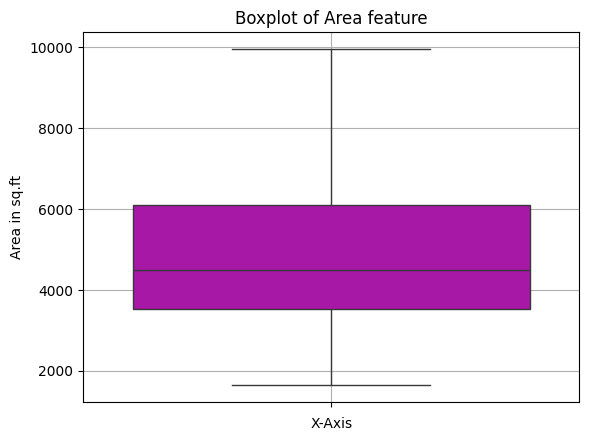

In [32]:
sns.boxplot(data['area'], color = 'm')
plt.title('Boxplot of Area feature')
plt.xlabel('X-Axis')
plt.ylabel('Area in sq.ft')
plt.grid()

### Encoding Technique

In [36]:
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [37]:
data['mainroad'].map({'yes': 0, 'no': 1})

0      0
1      0
2      0
3      0
4      0
      ..
540    0
541    1
542    0
543    1
544    0
Name: mainroad, Length: 527, dtype: int64

In [38]:
data['mainroad'] = data['mainroad'].map({'yes': 0, 'no': 1})
data['guestroom'] = data['guestroom'].map({'yes': 0, 'no': 1})
data['basement'] = data['basement'].map({'yes': 0, 'no': 1})
data['hotwaterheating'] = data['hotwaterheating'].map({'yes': 0, 'no': 1})
data['airconditioning'] = data['airconditioning'].map({'yes': 0, 'no': 1})
data['prefarea'] = data['prefarea'].map({'yes': 0, 'no': 1})
data['furnishingstatus'] = data['furnishingstatus'].map({'unfurnished': 1, 'semi-furnished': 2, 'furnished': 3})

In [39]:
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,0,1,1,1,0,2,0,3
1,12250000,8960,4,4,4,0,1,1,1,0,3,1,3
2,12250000,9960,3,2,2,0,1,0,1,1,2,0,2
3,12215000,7500,4,2,2,0,1,0,1,0,3,0,3
4,11410000,7420,4,1,2,0,0,0,1,0,2,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,0,1,0,1,1,2,1,1
541,1767150,2400,3,1,1,1,1,1,1,1,0,1,2
542,1750000,3620,2,1,1,0,1,1,1,1,0,1,1
543,1750000,2910,3,1,1,1,1,1,1,1,0,1,3


In [40]:
data.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [41]:
data.duplicated().sum()

0

In [42]:
data.select_dtypes(include = np.number).columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [43]:
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,0,1,1,1,0,2,0,3
1,12250000,8960,4,4,4,0,1,1,1,0,3,1,3
2,12250000,9960,3,2,2,0,1,0,1,1,2,0,2
3,12215000,7500,4,2,2,0,1,0,1,0,3,0,3
4,11410000,7420,4,1,2,0,0,0,1,0,2,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,0,1,0,1,1,2,1,1
541,1767150,2400,3,1,1,1,1,1,1,1,0,1,2
542,1750000,3620,2,1,1,0,1,1,1,1,0,1,1
543,1750000,2910,3,1,1,1,1,1,1,1,0,1,3


In [44]:
data.corr()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
price,1.000000,0.567533,0.363087,0.523598,0.436631,-0.294219,-0.274681,-0.182899,-0.092098,-0.465431,0.384819,-0.325323,0.301598
area,0.567533,1.000000,0.170949,0.236109,0.151585,-0.306569,-0.222279,-0.067879,0.024542,-0.289730,0.380676,-0.216596,0.168938
bedrooms,0.363087,0.170949,1.000000,0.358827,0.410117,0.012990,-0.083404,-0.101052,-0.060287,-0.172246,0.146721,-0.088338,0.134165
bathrooms,0.523598,0.236109,0.358827,1.000000,0.329708,-0.043653,-0.132679,-0.111263,-0.075061,-0.196998,0.191378,-0.074563,0.154913
stories,0.436631,0.151585,0.410117,0.329708,1.000000,-0.128244,-0.037583,0.177480,-0.025219,-0.307300,0.052770,-0.050708,0.112331
mainroad,-0.294219,-0.306569,0.012990,-0.043653,-0.128244,1.000000,0.097798,0.045363,-0.012713,0.108541,-0.201547,0.196413,-0.154479
guestroom,-0.274681,-0.222279,-0.083404,-0.132679,-0.037583,0.097798,1.000000,0.373888,-0.008770,0.143478,-0.050156,0.182851,-0.127060
basement,-0.182899,-0.067879,-0.101052,-0.111263,0.177480,0.045363,0.373888,1.000000,-0.008105,0.037390,-0.056907,0.234388,-0.103237
hotwaterheating,-0.092098,0.024542,-0.060287,-0.075061,-0.025219,-0.012713,-0.008770,-0.008105,1.000000,-0.129213,-0.070775,-0.051828,-0.022896
airconditioning,-0.465431,-0.289730,-0.172246,-0.196998,-0.307300,0.108541,0.143478,0.037390,-0.129213,1.000000,-0.154178,0.113560,-0.151853


<Axes: >

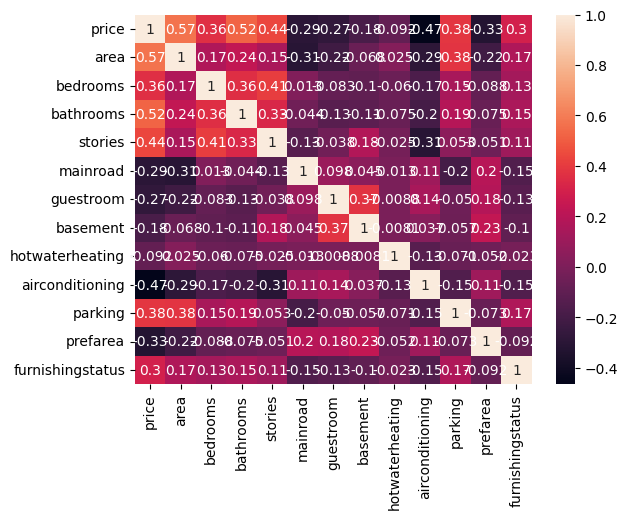

In [47]:
sns.heatmap(data.corr(), annot= True)

In [48]:
data.corr()['price']

price               1.000000
area                0.567533
bedrooms            0.363087
bathrooms           0.523598
stories             0.436631
mainroad           -0.294219
guestroom          -0.274681
basement           -0.182899
hotwaterheating    -0.092098
airconditioning    -0.465431
parking             0.384819
prefarea           -0.325323
furnishingstatus    0.301598
Name: price, dtype: float64

In [50]:
data['furnishingstatus'].value_counts()

furnishingstatus
2    219
1    175
3    133
Name: count, dtype: int64

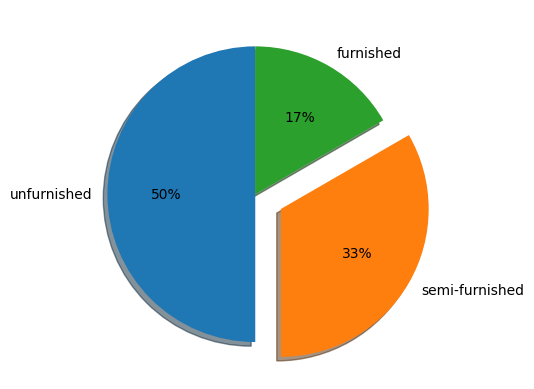

In [61]:
x = data['furnishingstatus'].unique()
label = ['unfurnished','semi-furnished', 'furnished']
plt.pie(x, labels= label, startangle = 90, shadow= True, autopct= '%1.0f%%', explode=[0,0.2,0])
plt.show()        